In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./data/2-corrected_by_stars.csv')
df = df.rename(columns={"frame_signal": "brightness"})
df.head()


,Unnamed: 0.1,Unnamed: 0,frame,bright_w,valence_w,max_w,bright_t,valence_t,max_t,bright_c,...,valence_s,max_s,corrected_focus,val_sq,stars_delta,stars_v_delta,corrected_by_stars,valence_corrected_by_stars,val_sq_corrected,brightness
0,0,0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000082,-5.267204,0.000005,-1.346587,1.813295,0.0
1,1,1,2.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000077,-4.529109,0.000005,-1.157889,1.340707,0.0
2,2,2,3.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000075,-4.475538,0.000005,-1.144193,1.309178,0.0
3,3,3,4.0,0.214669,129.0,3.0,0.011813,30.0,3.0,0.001886,...,65.0,10.0,0.000272,36.0,0.000074,-3.433871,0.000082,5.701561,32.507796,0.0
4,4,4,5.0,0.214583,134.0,3.0,0.011764,30.0,3.0,0.001940,...,65.0,9.0,0.000278,49.0,0.000075,-3.000538,0.000083,6.908919,47.733162,0.0


In [4]:
pulses = pd.DataFrame(columns=['start_frame', 'peak_frame', 'end_frame', 'duration', 'start_brightness', 'peak_brightness', 'end_brightness'])
pulse = {
    "start_frame": 0,
}


duration = 0
peak = 0

for index, row in df.iterrows():
    if index < 1:
        continue    
    if index + 2 > len(df):
        break
    
    prev_row = df.iloc[index-1]
    next_row = df.iloc[index+1]
    
    
    if row['brightness'] > 0:
        if prev_row['brightness'] == 0:
            duration = 1
            start_frame = row['frame']
            peak_frame = start_frame
            start_brightness = row['brightness']
            peak_brightness = 0
        else:
            duration +=1
            
        if row['brightness'] > prev_row['brightness'] and row['brightness'] > next_row['brightness']:
            
            if row['brightness'] > peak_brightness :
                peak_brightness = row['brightness']
                peak_frame = row['frame']
            
        if next_row['brightness'] == 0:
            end_frame = row['frame']
            end_brightness = row['brightness']
            list_row = [start_frame, peak_frame, end_frame, duration, start_brightness, peak_brightness, end_brightness]
            pulses.loc[len(pulses)] = list_row
        
pulses.head(10)

,start_frame,peak_frame,end_frame,duration,start_brightness,peak_brightness,end_brightness
0,25.0,27.0,32.0,8.0,0.000090,0.000103,0.000091
1,57.0,57.0,57.0,1.0,0.000090,0.000090,0.000090
2,59.0,61.0,63.0,5.0,0.000090,0.000110,0.000084
3,105.0,105.0,106.0,2.0,0.000130,0.000130,0.000099
4,149.0,149.0,151.0,3.0,0.000111,0.000111,0.000091
5,182.0,182.0,184.0,3.0,0.000129,0.000129,0.000093
6,227.0,227.0,228.0,2.0,0.000179,0.000179,0.000116
7,248.0,248.0,248.0,1.0,0.000083,0.000083,0.000083
8,269.0,272.0,275.0,7.0,0.000096,0.000106,0.000089
9,302.0,305.0,307.0,6.0,0.000090,0.000098,0.000092


In [5]:
def get_next_intervals(row):
    next_intervals = []
    peak= int(row['peak_frame'])
    
    if float(df[peak+32:peak+35][['brightness']].mean()) > 0:
        next_intervals.append('0.13')
    if float(df[peak+41:peak+36][['brightness']].mean()) > 0:
        next_intervals.append('0.18')
    if float(df[peak+77:peak+80][['brightness']].mean()) > 0:
        next_intervals.append('0.32')
    if float(df[peak+121:peak+124][['brightness']].mean()) > 0:
        next_intervals.append('0.5')
    if float(df[peak+243:peak+246][['brightness']].mean()) > 0:
        next_intervals.append('1.0')
    return next_intervals

pulses['next_intervals'] = pulses.apply (lambda row: get_next_intervals(row), axis=1)
pulses['next_intervals_count'] = pulses.apply (lambda row: len(row['next_intervals']), axis=1)


def get_prev_intervals(row):
    prev_intervals = []
    peak= int(row['peak_frame'])
    if float(df[peak-35:peak-32][['brightness']].mean()) > 0:
        prev_intervals.append('0.13')
    if float(df[peak-41:peak-36][['brightness']].mean()) > 0:
        prev_intervals.append('0.18')
    if float(df[peak-80:peak-77][['brightness']].mean()) > 0:
        prev_intervals.append('0.32')
    if float(df[peak-124:peak-122][['brightness']].mean()) > 0:
        prev_intervals.append('0.5')
    if float(df[peak-246:peak-243][['brightness']].mean()) > 0:
        prev_intervals.append('1.0')
    return prev_intervals

pulses['prev_intervals'] = pulses.apply (lambda row: get_prev_intervals(row), axis=1)
pulses['prev_intervals_count'] = pulses.apply (lambda row: len(row['prev_intervals']), axis=1)




pulses[0:10]

,start_frame,peak_frame,end_frame,duration,start_brightness,peak_brightness,end_brightness,next_intervals,next_intervals_count,prev_intervals,prev_intervals_count
0,25.0,27.0,32.0,8.0,0.000090,0.000103,0.000091,"[0.13, 0.32, 0.5, 1.0]",4,[],0
1,57.0,57.0,57.0,1.0,0.000090,0.000090,0.000090,[1.0],1,[0.13],1
2,59.0,61.0,63.0,5.0,0.000090,0.000110,0.000084,"[0.5, 1.0]",2,"[0.13, 0.18, 0.5, 1.0]",4
3,105.0,105.0,106.0,2.0,0.000130,0.000130,0.000099,"[0.32, 0.5, 1.0]",3,[0.32],1
4,149.0,149.0,151.0,3.0,0.000111,0.000111,0.000091,"[0.13, 0.32, 0.5, 1.0]",4,"[0.5, 1.0]",2
5,182.0,182.0,184.0,3.0,0.000129,0.000129,0.000093,"[0.5, 1.0]",2,"[0.13, 0.32, 0.5, 1.0]",4
6,227.0,227.0,228.0,2.0,0.000179,0.000179,0.000116,"[0.32, 0.5, 1.0]",3,"[0.32, 0.5]",2
7,248.0,248.0,248.0,1.0,0.000083,0.000083,0.000083,[],0,[],0
8,269.0,272.0,275.0,7.0,0.000096,0.000106,0.000089,"[0.13, 0.32, 0.5, 1.0]",4,"[0.5, 1.0]",2
9,302.0,305.0,307.0,6.0,0.000090,0.000098,0.000092,"[0.5, 1.0]",2,"[0.13, 0.18, 0.32, 0.5, 1.0]",5


In [6]:
def get_ratios(row):
    
    i = int(row.name)
    ratios = []
    peak= int(row['peak_frame'])
    
    distance = 0
    j = i + 1
    print("\n\n pulse: ")
    print(j-1)
    while distance < 250 and j < len(pulses):
        
        next_row = pulses.iloc[j]
        distance = int(next_row['peak_frame']) - peak
        print("  ---")
        
        ratio = distance / 244.5
        
        if (1.01 > ratio and ratio > 0.99) :
            print("    1.0")
            print(j)
            ratios.append(1.0)
        elif (.51 > ratio and ratio > 0.49) :
            print("    .50")
            print(j)
            ratios.append(0.5) 
        elif (.33 > ratio and ratio > 0.31) :
            print("    .32")
            print(j)
            ratios.append(0.32)
        elif (.19 > ratio and ratio > 0.17) :
            print("    .18")
            print(j)
            ratios.append(0.18)
        elif (.14 > ratio and ratio > 0.12) :
            print("    .13")
            print(j)
            ratios.append(0.13)
        j = j + 1
        
    #uniqe
    return np.unique(ratios)
pulses['ratios'] = pulses.apply (lambda row: get_ratios(row), axis=1)

pulses['ratios_count'] = pulses.apply (lambda row: len(row['ratios']), axis=1)



pulses[['peak_frame', 'duration', 'ratios']][0:10]



 pulse: 
0
  ---
    .13
1
  ---
    .13
2
  ---
    .32
3
  ---
    .50
4
  ---
  ---
  ---
  ---
    1.0
8
  ---


 pulse: 
1
  ---
  ---
  ---
  ---
  ---
  ---
  ---
  ---
  ---


 pulse: 
2
  ---
    .18
3
  ---
  ---
    .50
5
  ---
  ---
  ---
  ---
    1.0
9
  ---


 pulse: 
3
  ---
    .18
4
  ---
    .32
5
  ---
    .50
6
  ---
  ---
  ---
  ---
    1.0
10
  ---


 pulse: 
4
  ---
    .13
5
  ---
    .32
6
  ---
  ---
    .50
8
  ---
  ---
  ---
    1.0
11
  ---


 pulse: 
5
  ---
    .18
6
  ---
  ---
  ---
    .50
9
  ---
  ---
  ---
  ---
    1.0
13
  ---


 pulse: 
6
  ---
  ---
    .18
8
  ---
    .32
9
  ---
    .50
10
  ---
  ---
  ---
  ---
    1.0
14
  ---


 pulse: 
7
  ---
  ---
  ---
  ---
  ---
  ---
  ---
  ---


 pulse: 
8
  ---
    .13
9
  ---
    .32
10
  ---
    .50
11
  ---
  ---
  ---
  ---
    1.0
15
  ---
  ---


 pulse: 
9
  ---
    .18
10
  ---
  ---
  ---
    .50
13
  ---
  ---
  ---
  ---
    1.0
17
  ---


 pulse: 
10
  ---
    .18
11
  ---
  ---


,peak_frame,duration,ratios
0,27.0,8.0,"[0.13, 0.32, 0.5, 1.0]"
1,57.0,1.0,[]
2,61.0,5.0,"[0.18, 0.5, 1.0]"
3,105.0,2.0,"[0.18, 0.32, 0.5, 1.0]"
4,149.0,3.0,"[0.13, 0.32, 0.5, 1.0]"
5,182.0,3.0,"[0.18, 0.5, 1.0]"
6,227.0,2.0,"[0.18, 0.32, 0.5, 1.0]"
7,248.0,1.0,[]
8,272.0,7.0,"[0.13, 0.32, 0.5, 1.0]"
9,305.0,6.0,"[0.18, 0.5, 1.0]"


In [7]:
def get_prev_interval(row):
    i = int(row.name)
    if i == 0:
        return 0
    prev_row = pulses.iloc[i-1]
    return row['peak_frame'] - prev_row['peak_frame']
pulses['prev_interval'] = pulses.apply (lambda row: get_prev_interval(row), axis=1)

def get_next_interval(row):
    i = int(row.name)
    if i > len(pulses) -2:
        return 0
    next_row = pulses.iloc[i+1]
    return next_row['peak_frame'] - row['peak_frame']
pulses['next_interval'] = pulses.apply (lambda row: get_next_interval(row), axis=1)

pulses


,start_frame,peak_frame,end_frame,duration,start_brightness,peak_brightness,end_brightness,next_intervals,next_intervals_count,prev_intervals,prev_intervals_count,ratios,ratios_count,prev_interval,next_interval
0,25.0,27.0,32.0,8.0,0.000090,0.000103,0.000091,"[0.13, 0.32, 0.5, 1.0]",4,[],0,"[0.13, 0.32, 0.5, 1.0]",4,0.0,30.0
1,57.0,57.0,57.0,1.0,0.000090,0.000090,0.000090,[1.0],1,[0.13],1,[],0,30.0,4.0
2,59.0,61.0,63.0,5.0,0.000090,0.000110,0.000084,"[0.5, 1.0]",2,"[0.13, 0.18, 0.5, 1.0]",4,"[0.18, 0.5, 1.0]",3,4.0,44.0
3,105.0,105.0,106.0,2.0,0.000130,0.000130,0.000099,"[0.32, 0.5, 1.0]",3,[0.32],1,"[0.18, 0.32, 0.5, 1.0]",4,44.0,44.0
4,149.0,149.0,151.0,3.0,0.000111,0.000111,0.000091,"[0.13, 0.32, 0.5, 1.0]",4,"[0.5, 1.0]",2,"[0.13, 0.32, 0.5, 1.0]",4,44.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,8092.0,8096.0,8099.0,8.0,0.000090,0.000102,0.000090,[0.13],1,"[0.5, 1.0]",2,[0.13],1,45.0,7.0
256,8103.0,8103.0,8103.0,1.0,0.000088,0.000088,0.000088,[],0,[],0,[],0,7.0,3.0
257,8106.0,8106.0,8106.0,1.0,0.000094,0.000094,0.000094,[],0,[],0,[0.18],1,3.0,22.0
258,8125.0,8128.0,8132.0,8.0,0.000090,0.000105,0.000091,[],0,"[0.13, 0.18, 0.32, 0.5, 1.0]",5,[],0,22.0,24.0


array([[<AxesSubplot:title={'center':'next_interval'}>,
        <AxesSubplot:title={'center':'prev_interval'}>]], dtype=object)

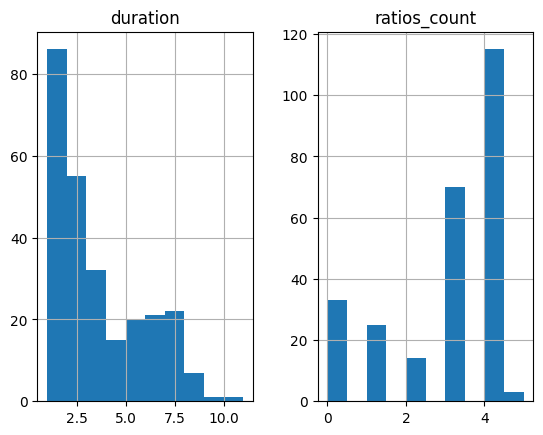

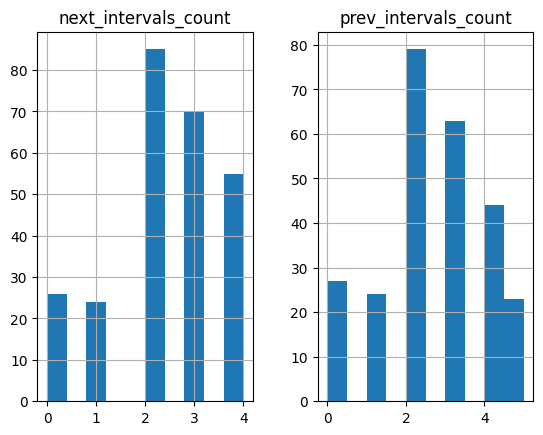

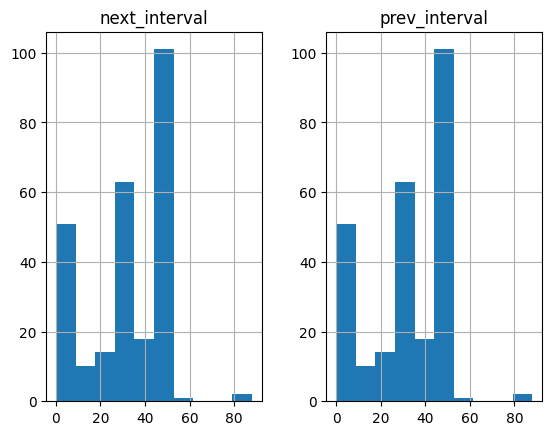

In [8]:
pulses[['duration', 'ratios_count']].hist()

pulses[['next_intervals_count', 'prev_intervals_count']].hist()
pulses[['next_interval', 'prev_interval']].hist()


In [9]:
pulses.to_csv('./data/3-pulses.csv')
